In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
df_netflix_final = pd.read_csv("analisis_netflix.csv")

In [23]:
df_netflix_final.sample(10)

,type,title,director,country,release_year,age_rating,genre,rating,stars,votes,month_added,year_added,duration_min,seasons
4266,TV Show,sleepless society: nyctophobia,Not Given,Thailand,2019,TV-MA,International TV Shows,5.8,Laila Boonyasak,49,8,2019,0,1
278,Movie,trollhunters: rise of the titans,"Johane Matte, Andrew L. Schmidt, Francisco Rui...",Not Given,2021,TV-Y7,Children & Family Movies,6.6,Johane Matte,4970,7,2021,106,0
4367,TV Show,tales of the city,Not Given,United States,2019,TV-MA,TV Dramas,7.4,Laura Linney,8161,6,2019,0,1
3374,TV Show,crazy delicious,Not Given,United Kingdom,2020,TV-PG,British TV Shows,6.7,Jayde Adams,1019,6,2020,0,1
4839,TV Show,knights of sidonia,Not Given,Japan,2015,TV-MA,Anime Series,7.7,Pete Sepenuk,4394,12,2019,0,2
3055,TV Show,power rangers beast morphers,Not Given,United States,2020,TV-Y7,Kids' TV,8.2,Oliver Driver,33,10,2020,0,2
2947,TV Show,bhaag beanie bhaag,Not Given,India,2020,TV-MA,International TV Shows,4.2,Swara Bhaskar,6685,12,2020,0,1
4513,TV Show,7 days out,Not Given,United States,2018,TV-PG,Docuseries,6.8,Karl Lagerfeld,561,12,2018,0,1
2630,TV Show,the neighbor,Not Given,Spain,2021,TV-MA,International TV Shows,5.8,Marcus Dunstan,7785,5,2021,0,2
3946,TV Show,the witcher,Not Given,United States,2019,TV-MA,International TV Shows,8.2,Henry Cavill,481841,12,2019,0,1


``Visualización de la distribución de películas y series en plataforma``

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10132\2001564326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df_netflix_final, palette='viridis')


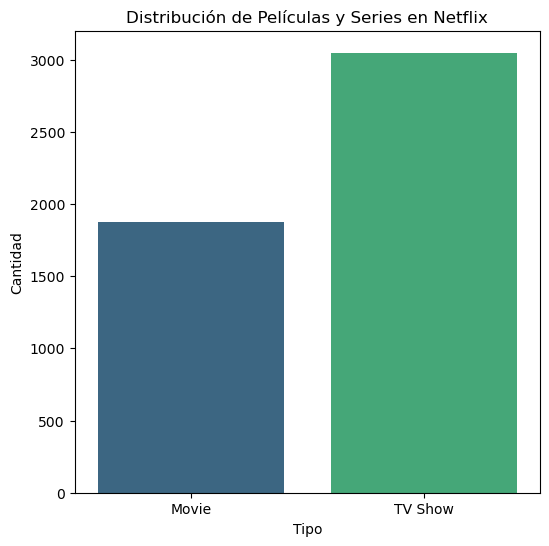

In [24]:

plt.figure(figsize=(6,6))
sns.countplot(x='type', data=df_netflix_final, palette='viridis')
plt.title('Distribución de Películas y Series en Netflix')
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.show()

``Visualización de cantidad de estrenos por año, diferenciando entre peliculas y series``

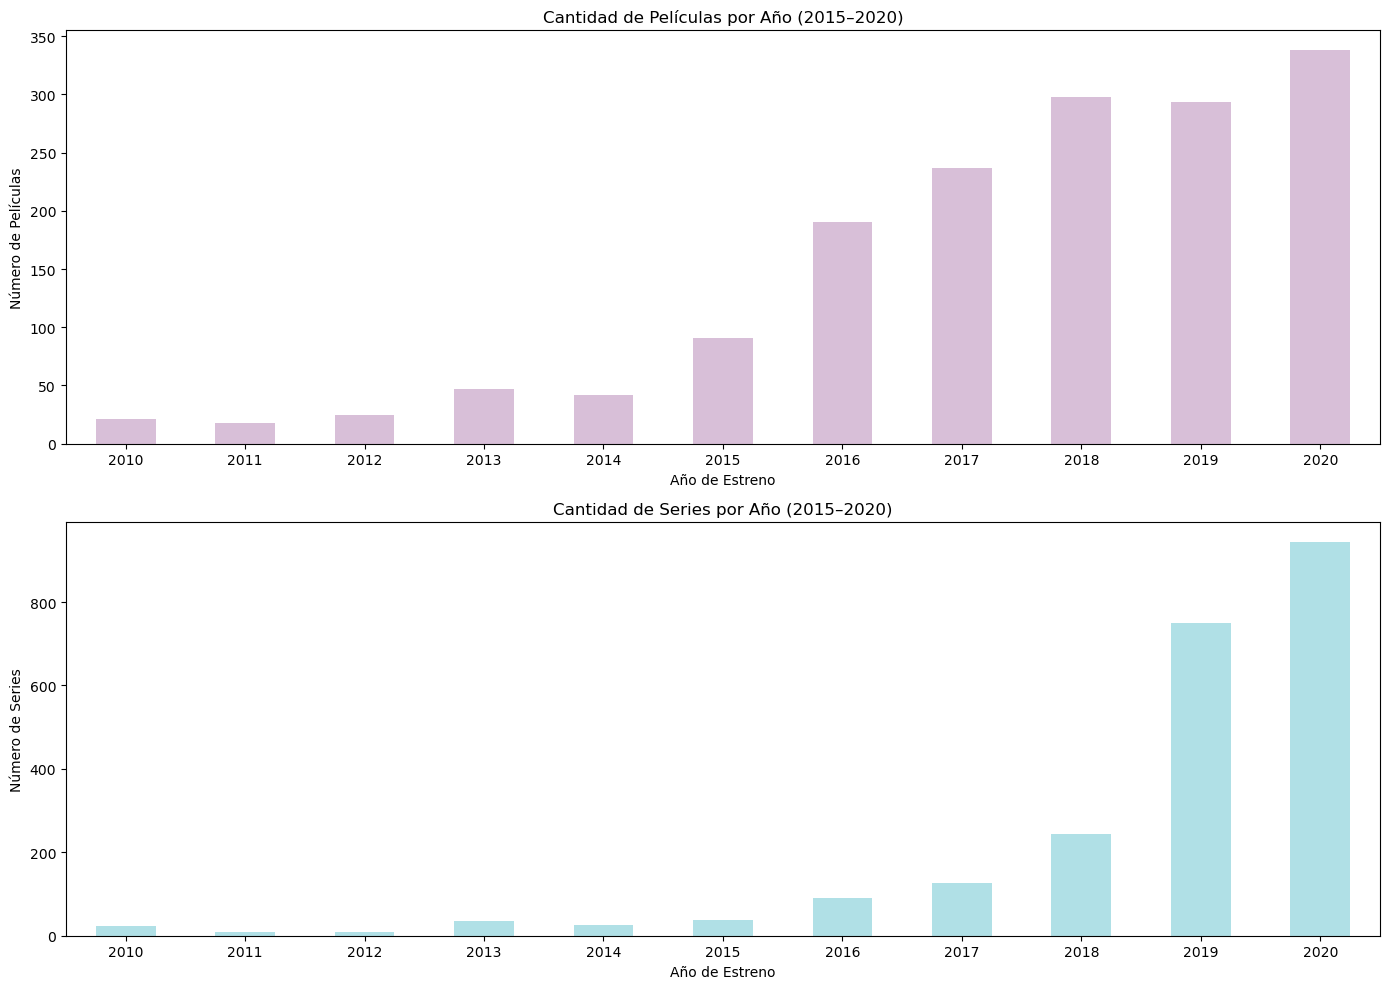

In [25]:
# Filtramos directamente por tipo y año (pelicula y serie respectiavmente)
peliculas = df_netflix_final[
    (df_netflix_final['type'] == 'Movie') &
    (df_netflix_final['release_year'].between(2010, 2020))
]

series = df_netflix_final[
    (df_netflix_final['type'] == 'TV Show') &
    (df_netflix_final['release_year'].between(2010, 2020))
]

# Creamos los subplots
plt.figure(figsize=(14,10))

# Gráfico de películas
plt.subplot(2,1,1)
peliculas['release_year'].value_counts().sort_index().plot(kind='bar', color='thistle')
plt.title('Cantidad de Películas por Año (2015–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Películas')
plt.xticks(rotation=0)

# Gráfico de series
plt.subplot(2,1,2)
series['release_year'].value_counts().sort_index().plot(kind='bar', color='powderblue')
plt.title('Cantidad de Series por Año (2015–2020)')
plt.xlabel('Año de Estreno')
plt.ylabel('Número de Series')
plt.xticks(rotation=0)

# Ajuste de diseño
plt.tight_layout()
plt.show()

``Visualización de la cantidad de votos por año, diferenciando entre peliculas y series`` 

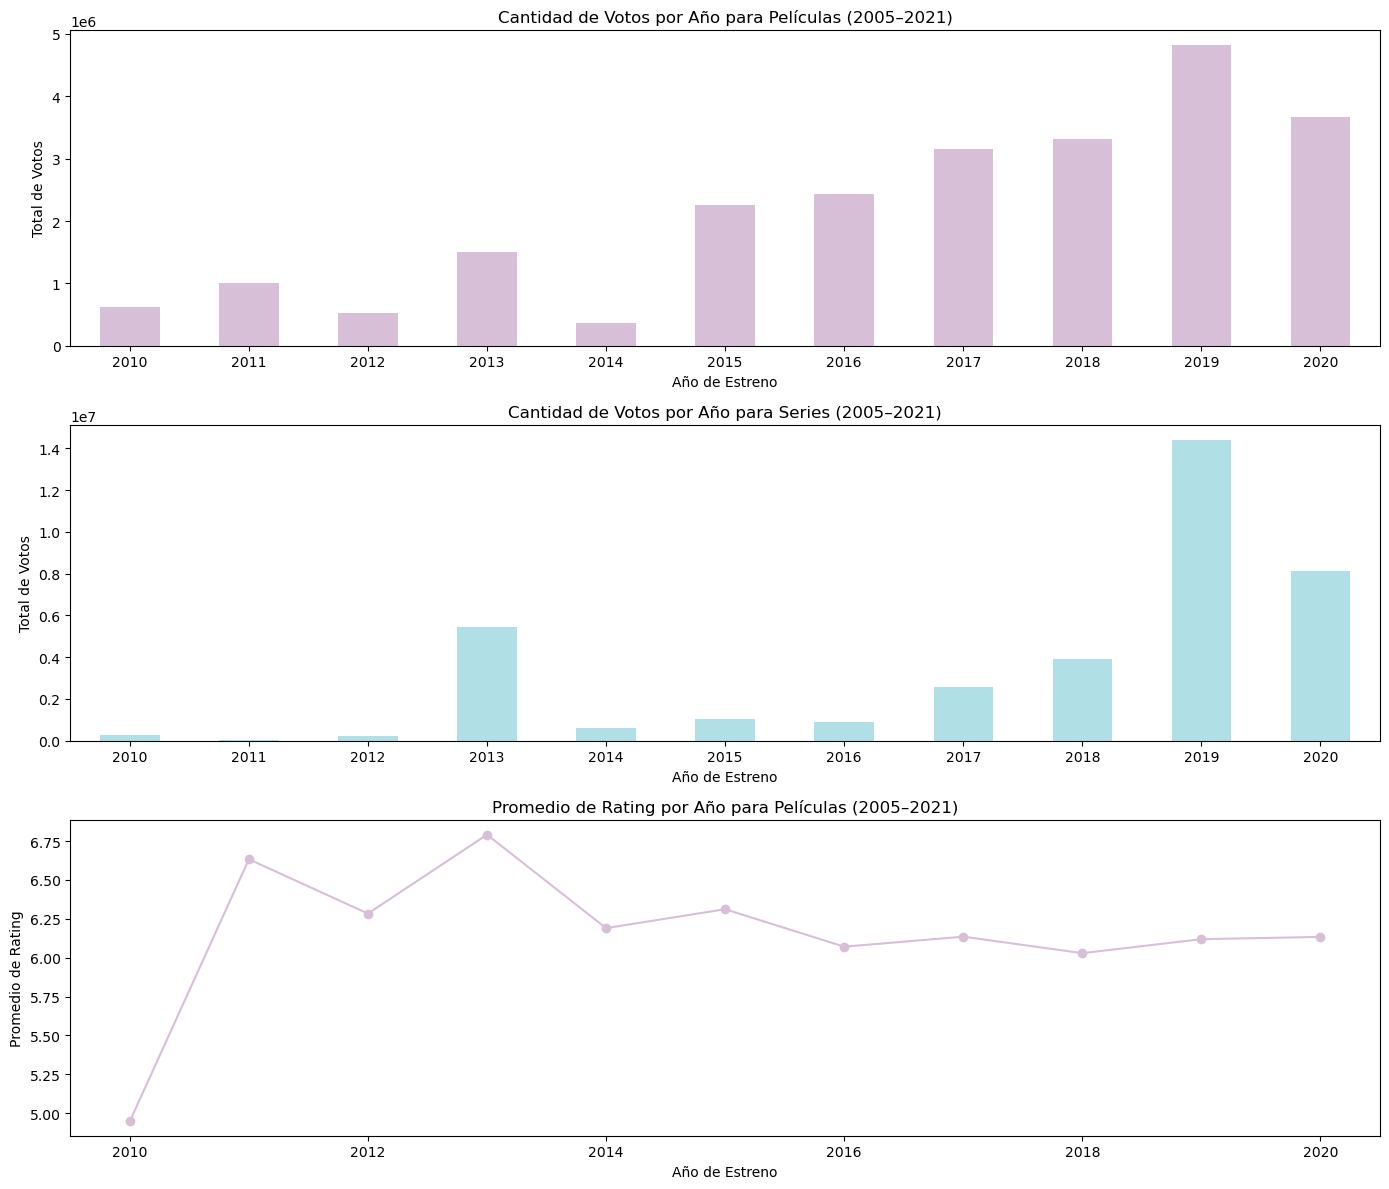

In [26]:
# Filtramos por tipo y año
peliculas = df_netflix_final[
    (df_netflix_final['type'] == 'Movie') & 
    (df_netflix_final['release_year'].between(2010, 2020))
]

series = df_netflix_final[
    (df_netflix_final['type'] == 'TV Show') & 
    (df_netflix_final['release_year'].between(2010, 2020))
]

# Creamos los subplots
plt.figure(figsize=(14, 12))

# Gráfico de películas: cantidad de votos por año
plt.subplot(3, 1, 1)
peliculas.groupby('release_year')['votes'].sum().plot(kind='bar', color='thistle')
plt.title('Cantidad de Votos por Año para Películas (2005–2021)')
plt.xlabel('Año de Estreno')
plt.ylabel('Total de Votos')
plt.xticks(rotation=0)

# Gráfico de series: cantidad de votos por año
plt.subplot(3, 1, 2)
series.groupby('release_year')['votes'].sum().plot(kind='bar', color='powderblue')
plt.title('Cantidad de Votos por Año para Series (2005–2021)')
plt.xlabel('Año de Estreno')
plt.ylabel('Total de Votos')
plt.xticks(rotation=0)

# Gráfico de películas: promedio de rating por año
plt.subplot(3, 1, 3)
peliculas.groupby('release_year')['rating'].mean().plot(kind='line', color='thistle', marker='o')
plt.title('Promedio de Rating por Año para Películas (2005–2021)')
plt.xlabel('Año de Estreno')
plt.ylabel('Promedio de Rating')
plt.xticks(rotation=0)

# Ajuste de diseño
plt.tight_layout()
plt.show()

``Visualización promedio de la calificación dada por los usuarios por año de estreno`` PLANTEAR HACER BOXPLOT

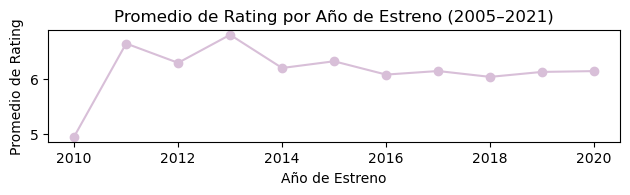

In [27]:
# Gráfico promedio de rating por año de estreno
plt.subplot(3, 1, 3)
peliculas.groupby('release_year')['rating'].mean().plot(kind='line', color='thistle', marker='o')
plt.title('Promedio de Rating por Año de Estreno (2005–2021)')
plt.xlabel('Año de Estreno')
plt.ylabel('Promedio de Rating')
plt.xticks(rotation=0)

# Ajuste de diseño
plt.tight_layout()
plt.show()

``Visualización Top 10 países con mayor producción de títulos`` 


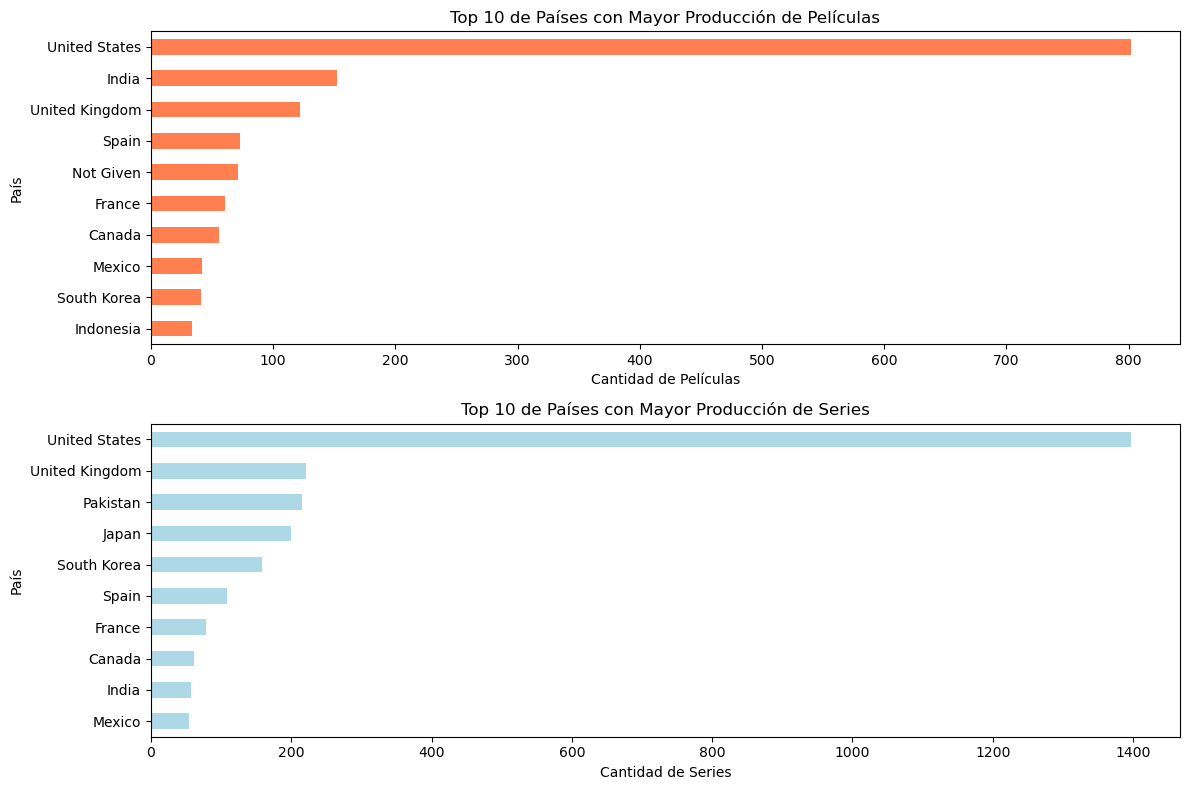

In [28]:
# Filtramos por tipo (película o serie) y luego contamos los títulos por país y tipo
top_peliculas = df_netflix_final[df_netflix_final['type'] == 'Movie']['country'].value_counts().sort_values(ascending=True).tail(10)
top_series = df_netflix_final[df_netflix_final['type'] == 'TV Show']['country'].value_counts().sort_values(ascending=True).tail(10)

# Creamos los gráficos
plt.figure(figsize=(12, 8))

# Gráfico de películas
plt.subplot(2, 1, 1)
top_peliculas.plot(kind='barh', color='coral')
plt.title('Top 10 de Países con Mayor Producción de Películas')
plt.xlabel('Cantidad de Películas')
plt.ylabel('País')

# Gráfico de series
plt.subplot(2, 1, 2)
top_series.plot(kind='barh', color='lightblue')
plt.title('Top 10 de Países con Mayor Producción de Series')
plt.xlabel('Cantidad de Series')
plt.ylabel('País')


plt.tight_layout()
plt.show()

``Visualización de la cantidad de títulos por país de producción diferenciando entre series y películas``

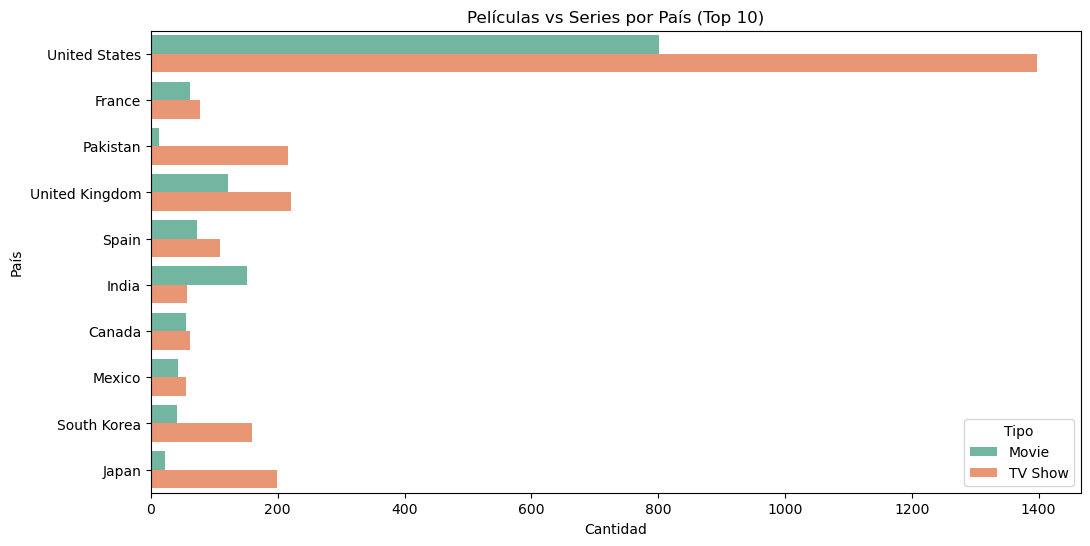

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(y='country', hue='type', data=df_netflix_final[df_netflix_final['country'].notnull() & df_netflix_final['country'].isin(df_netflix_final['country'].value_counts().head(10).index)], palette='Set2')
plt.title('Películas vs Series por País (Top 10)')
plt.xlabel('Cantidad')
plt.ylabel('País')
plt.legend(title='Tipo')
plt.show()

``Visualización de la distribución de la duración de las películas`` 

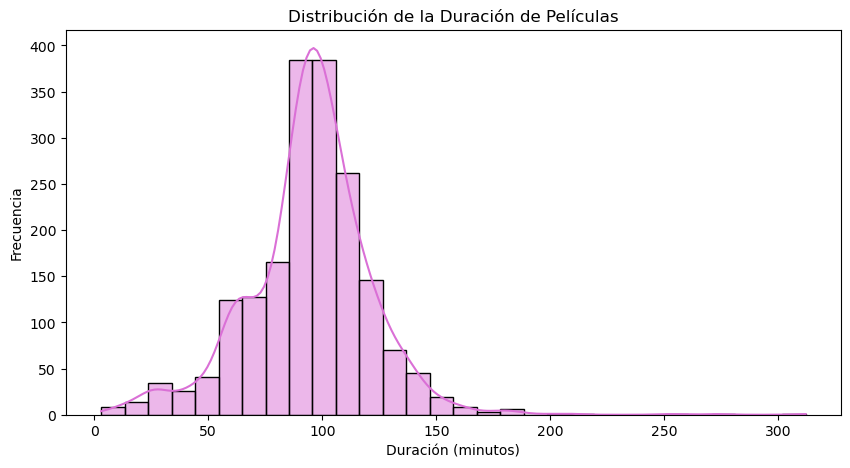

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df_netflix_final[df_netflix_final['duration_min'] > 0]['duration_min'], bins=30, kde=True, color='orchid')
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

``Visualización de cantidad de series por número de temporadas``

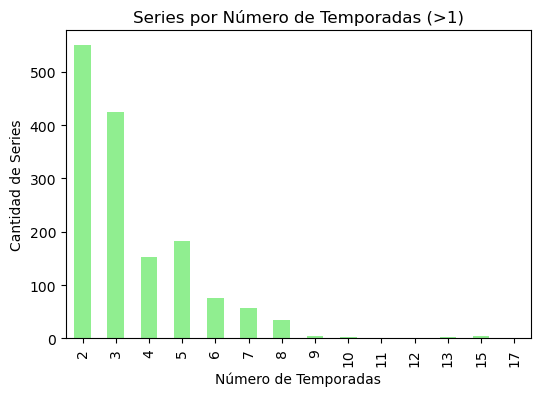

In [31]:
plt.figure(figsize=(6,4))
df_netflix_final[df_netflix_final['seasons'] > 1]['seasons'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Series por Número de Temporadas (>1)')
plt.xlabel('Número de Temporadas')
plt.ylabel('Cantidad de Series')
plt.show()

``Visualización top 10 géneros en la plataforma``

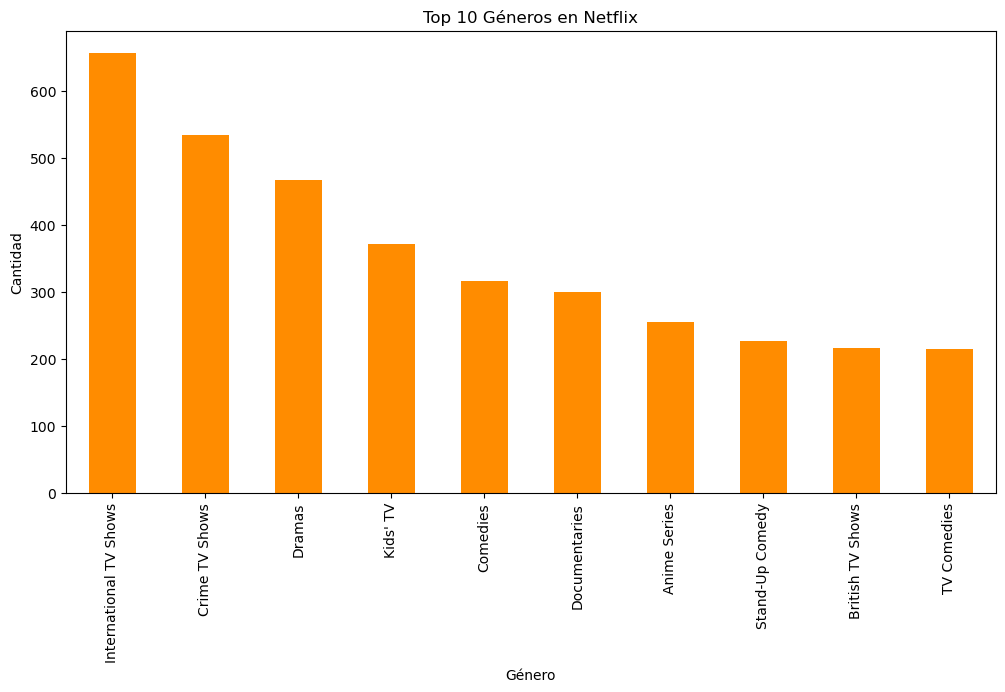

In [32]:
plt.figure(figsize=(12,6))
df_netflix_final['genre'].str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', color='darkorange')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()